# Data Exploration

In [ ]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


In [ ]:
### Import data 
df = pd.read_csv("online_shoppers_intention.csv", header = 0)

In [ ]:
df_explore = df.copy()

In [ ]:
# there are 12330 records and 18 attributes

df_explore.shape

(12330, 18)

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# all the data types are numeric
df_explore.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [ ]:
df_explore.sample(5, random_state=0)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12245,0.0,0.000000,0.0,0.00,74.0,3109.404167,0.009459,0.042859,0.0,0.0,Nov,2,2,1,2,Returning_Visitor,False,False
9704,16.0,180.666667,1.0,649.25,113.0,8041.588870,0.007937,0.026808,0.0,0.0,Dec,2,6,7,1,Returning_Visitor,False,False
9177,9.0,186.673077,0.0,0.00,73.0,1606.308250,0.010295,0.019109,0.0,0.0,Nov,3,2,8,2,Returning_Visitor,True,False
8848,0.0,0.000000,0.0,0.00,2.0,0.000000,0.200000,0.200000,0.0,0.0,Nov,3,2,5,20,Returning_Visitor,False,False
2768,0.0,0.000000,0.0,0.00,1.0,0.000000,0.200000,0.200000,0.0,1.0,May,4,1,2,3,Returning_Visitor,True,False


In [ ]:
# grouping data into variables. features variable is added to include all attributes except the dependent variable.  

dep_var = ['Revenue']

categorical_vars = ['Month', 'OperatingSystems'
                 ,'Browser','Region','TrafficType', 'VisitorType','Weekend']

discrete_vars = ['Administrative','Administrative_Duration','Informational'
                 ,'Informational_Duration','ProductRelated','ProductRelated_Duration'
                 ,'BounceRates','ExitRates','PageValues','SpecialDay']

features = ['Administrative','Administrative_Duration','Informational'
                 ,'Informational_Duration','ProductRelated','ProductRelated_Duration'
                 ,'BounceRates','ExitRates','PageValues','SpecialDay','Month','OperatingSystems'
                 ,'Browser','Region','TrafficType','VisitorType','Weekend']

In [ ]:
# Check for null values

[(x, y) for x, y in zip(df_explore.isna().sum(), df_explore.isnull().sum().index) if x > 0]


[(14, 'Administrative'),
 (14, 'Administrative_Duration'),
 (14, 'Informational'),
 (14, 'Informational_Duration'),
 (14, 'ProductRelated'),
 (14, 'ProductRelated_Duration'),
 (14, 'BounceRates'),
 (14, 'ExitRates')]

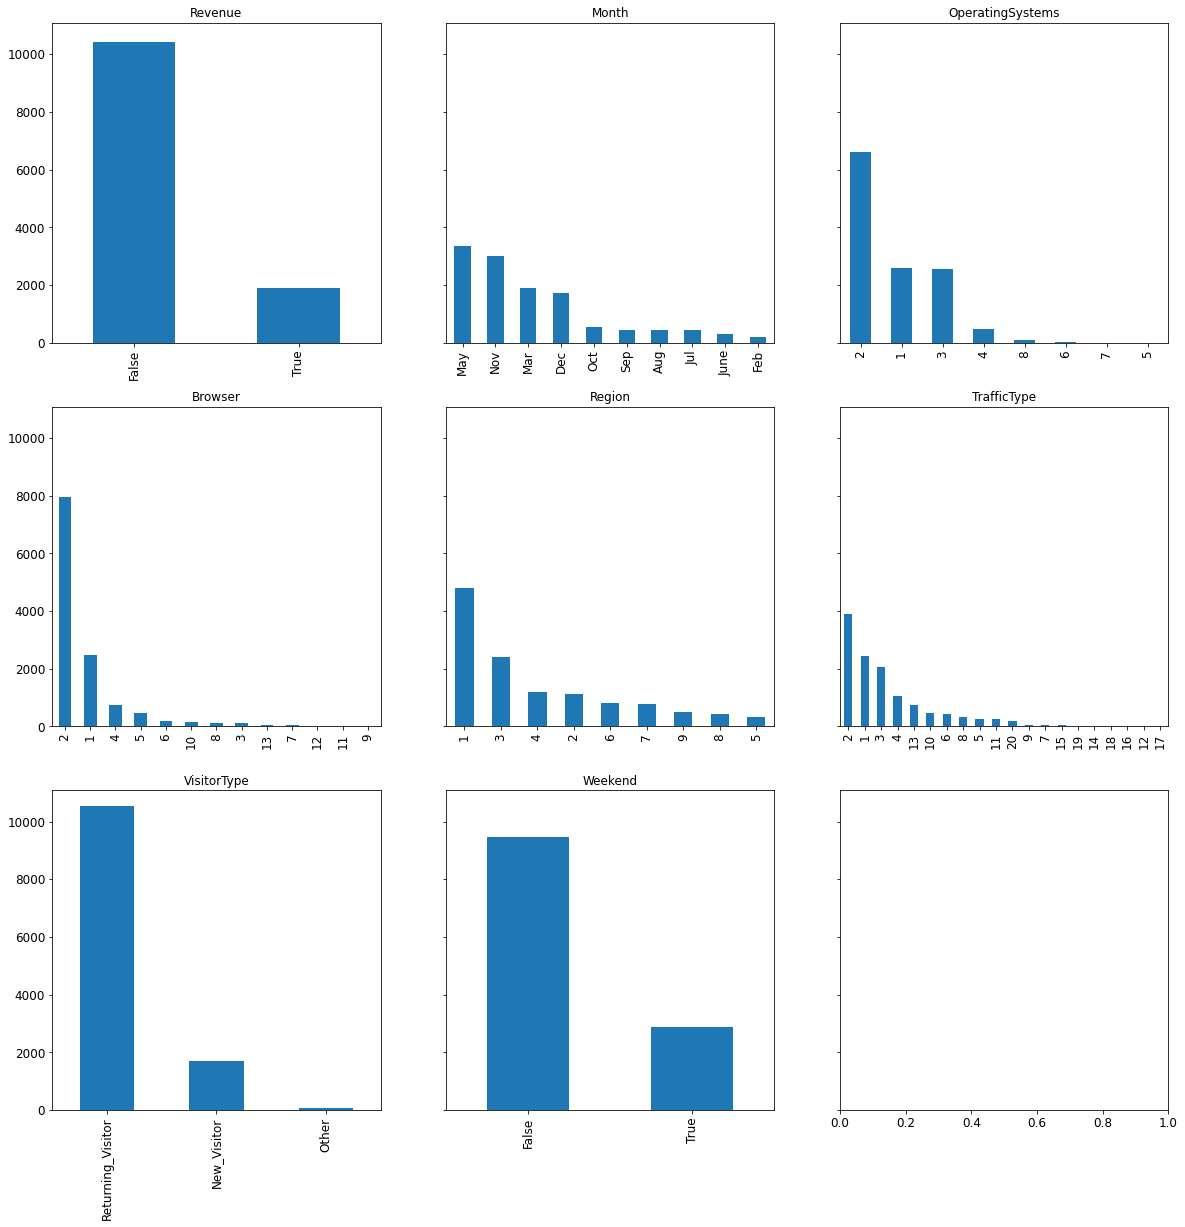

In [ ]:
# show distribution of data - dependent variables and categorical variables

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20), sharey=True)
#axes[2,2].set_axis_off()
#axes[2,3].set_axis_off()

i=0
j=0
k=0

for k in df_explore.loc[:, dep_var + categorical_vars ]:
    df_explore[k].value_counts().plot(kind = 'bar', ax=axes[j,i])
    axes[j,i].set_title(k)
    i=i+1
    i=i%3
    if i==0: 
      j=j+1

Observations:  
1. More people have no purchase
2. May and Nov have the most records
3. Special day =0 has the most record
4. Operating System 2 is the most popular
5. Browser 2 is the most popular
6. Region 1 and 3 count for the most records
7. Traffic Type 2 has the most record among all traffic types. 
8. Returning visitors are the majority
9. Most records aren't on the weekend. 



In [ ]:
df_explore.loc[:, dep_var + discrete_vars ].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


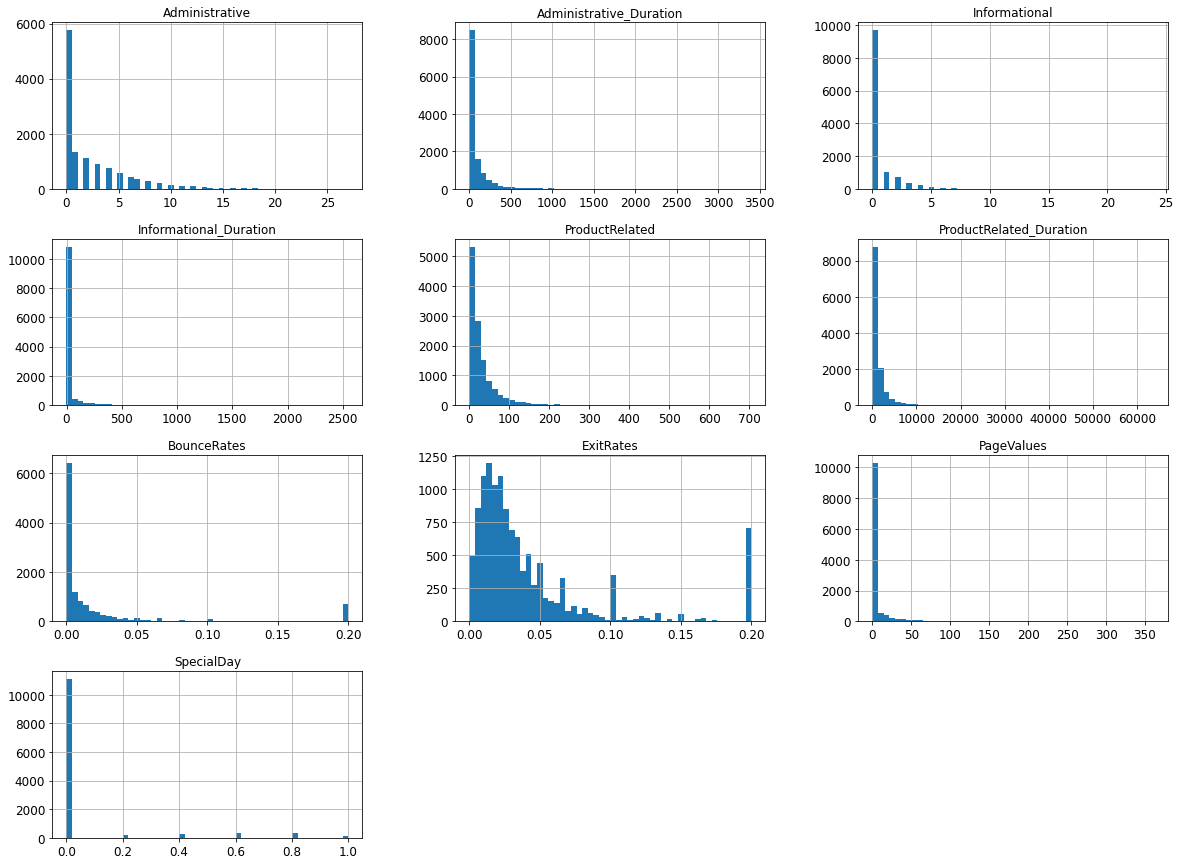

In [ ]:
df_explore.loc[:, discrete_vars ].hist(bins=50, figsize=(20,15))
plt.show()

Obervations: 


# Data Processing

In [ ]:
# Drop rows with missing (N/A) values instead of imputing?

#df.dropna(inplace=True)
#df.shape

In [ ]:
# Change Reveune to 0 and 1. 1 is true 0 is false

df['Revenue'] = df['Revenue'].apply(lambda x: 1 if x == True else 0)
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [ ]:
# assign data to 3 - other bucket

df['Weekend'] = df['Weekend'].apply(lambda x: 1 if x == True else 0)
df['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [ ]:
# For all categorial variables, we want to create dummy varibles using one hot encoding. 
# For all discrete variables, we want to scale the data. 

# Categorical - one hot encode
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_pipe = Pipeline([cat_ohe_step])
cat_transformers = [('cat', cat_pipe, categorical_vars)]

# Numerical - scale using standard scaler
num_si_step = ('si', SimpleImputer(strategy='median'))
num_scl_step = ('scl', StandardScaler()) 
num_steps = [num_si_step, num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, discrete_vars)]

In [ ]:
# execute the pipeline

ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(df[categorical_vars + discrete_vars])
X = ct.transform(df[categorical_vars + discrete_vars ])
y = df[['Revenue']].values
print(X.shape, y.shape)

(12330, 75) (12330, 1)


# Correlation Analysis

In [ ]:
corr_matrix = df_explore.loc[:, ['Revenue'] + features].corr(method='pearson')
corr_matrix['Revenue'].sort_values(ascending=False)

Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158280
ProductRelated_Duration    0.152130
Administrative             0.138631
Informational              0.095085
Administrative_Duration    0.093395
Informational_Duration     0.070250
Weekend                    0.029295
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150621
ExitRates                 -0.206886
Name: Revenue, dtype: float64

Observations: 
1. PageValues seems to have a positive coorelation

In [ ]:
# as PageValues is most important variable to predict revenue, explore further the relationship with other variables
# weekend vs PageValues
# workday has higher PageValue, not weekend, which is align with observation on Revenue
weekend_analysis=df.groupby('Weekend')['PageValues'].agg('sum').round(2)
weekend_analysis

Weekend
0    54563.30
1    18051.25
Name: PageValues, dtype: float64

In [ ]:
# Specialday vs PageValues
# non-special day has
specialday_analysis=df.groupby('SpecialDay')['PageValues'].agg('sum').round(2)
specialday_analysis

SpecialDay
0.0    69706.98
0.2      656.90
0.4      553.38
0.6     1001.69
0.8      411.84
1.0      283.75
Name: PageValues, dtype: float64

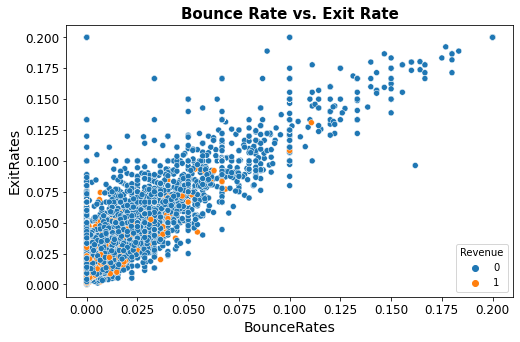

In [ ]:
# Bounce Rate vs Exit Rate
# Bounce rate is positive collerated with Exit rate
# the higher Bounce rate, the less densive revenue
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'BounceRates',y='ExitRates',data=df,hue='Revenue')
plt.title('Bounce Rate vs. Exit Rate', fontweight='bold', fontsize=15)
plt.show()

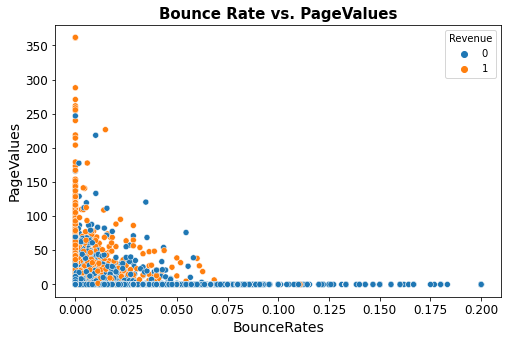

In [ ]:
# the lower Bounce Rate, the higher PageValue, 
# a lot of revenue are generated with zero Bounce rate, ? are those return vistor?
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'BounceRates',y='PageValues',data=df,hue='Revenue')
plt.title('Bounce Rate vs. PageValues', fontweight='bold', fontsize=15)
plt.show()

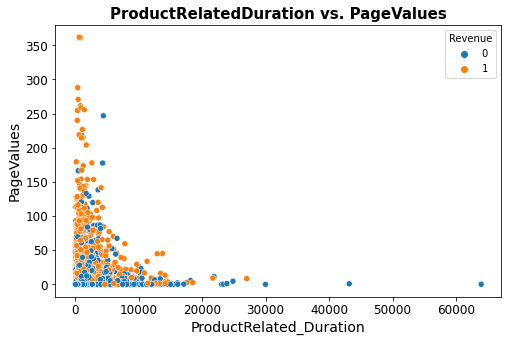

In [ ]:
# product pages rank 2nd in correlation matrix vs PageValues
# the longer product  duration, the less pagevalues, the longer spent on pages, less revenue ???
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'ProductRelated_Duration',y='PageValues', data=df,hue='Revenue')
plt.title('ProductRelatedDuration vs. PageValues', fontweight='bold', fontsize=15)
plt.show()

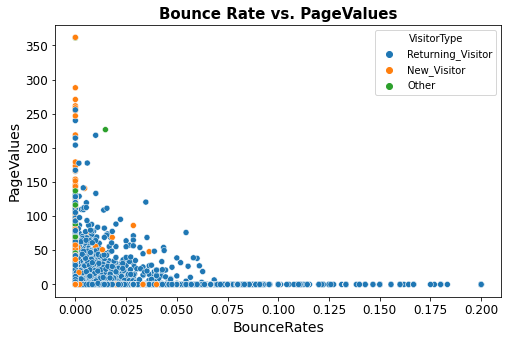

In [ ]:
# how to attract new vistors, understand return vistors behaviour
# new vistors are more likely increase pagevalues
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'BounceRates',y='PageValues',data=df,hue='VisitorType')
plt.title('Bounce Rate vs. PageValues', fontweight='bold', fontsize=15)
plt.show()

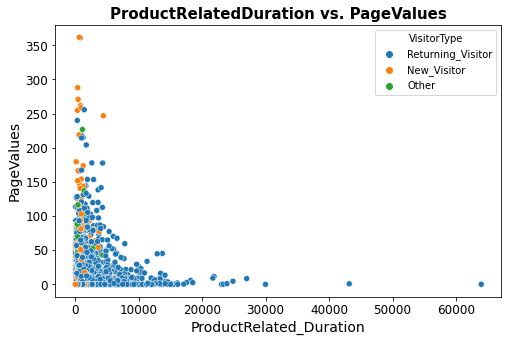

In [ ]:
# unlike returning visitor, new visitor just quickly browse Productpage, 
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'ProductRelated_Duration',y='PageValues',data=df,hue='VisitorType')
plt.title('ProductRelatedDuration vs. PageValues', fontweight='bold', fontsize=15)
plt.show()

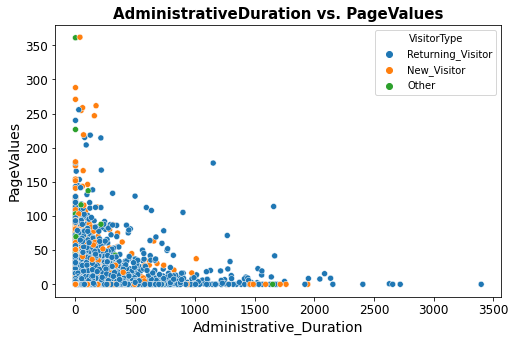

In [ ]:
# on Adminstrative page, similar with product page
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'Administrative_Duration',y='PageValues',data=df,hue='VisitorType')
plt.title('AdministrativeDuration vs. PageValues', fontweight='bold', fontsize=15)
plt.show()

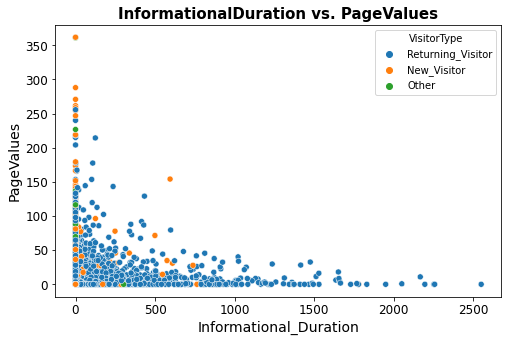

In [ ]:
# on Informational page, similar with product page
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'Informational_Duration',y='PageValues',data=df,hue='VisitorType')
plt.title('InformationalDuration vs. PageValues', fontweight='bold', fontsize=15)
plt.show()

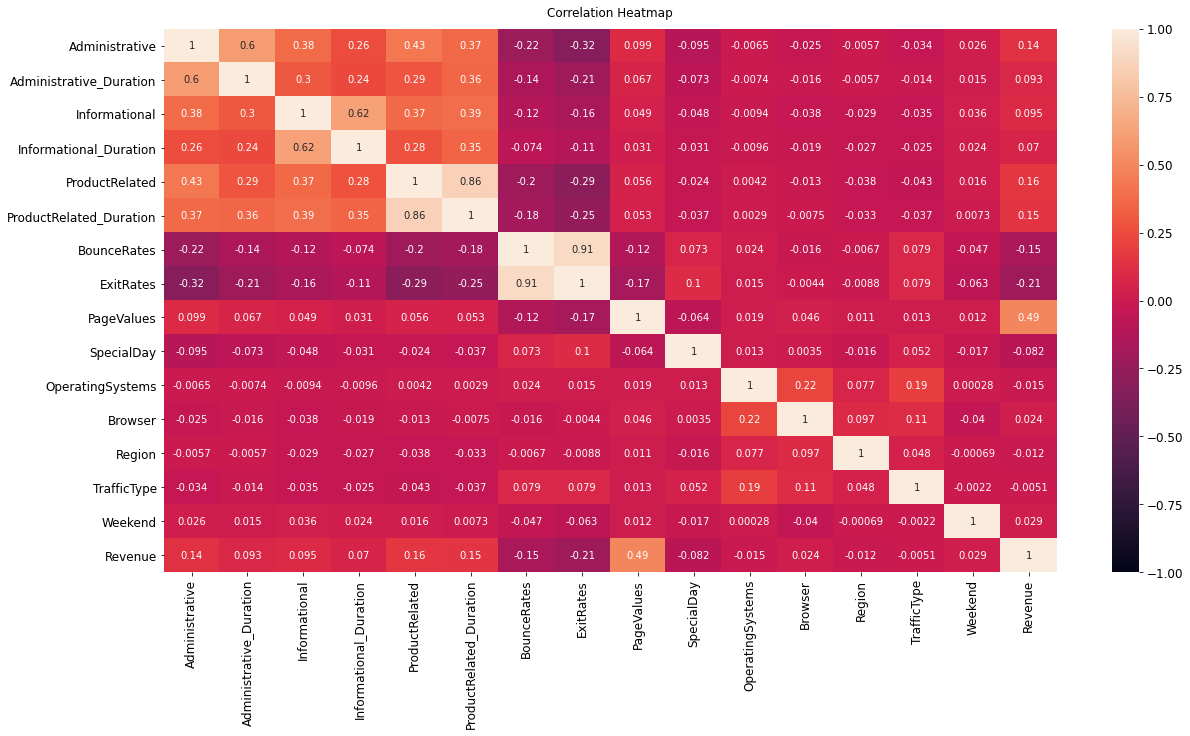

In [ ]:
fig,ax = plt.subplots(figsize=(20,10)) 
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,ax=ax)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Model Analysis

In [ ]:
#split train and test model.  We use 80/20 method and will stratified based on the y value as it's imbalanced.  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(9864, 75) (2466, 75) (9864, 1) (2466, 1)


In [ ]:
# define the models for the cross validation

from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.linear_model import LogisticRegression as lgt

classifiers = [
    knnc(),
    rfc(random_state=0),
    dtc(random_state=0),
    lgt(random_state=0, solver='liblinear'),]
classifier_names = [
    'K nearest neighbors',
    'Random Forest Classifier',
    'Decision Tree Classifier',
    'LogisticRegression',
     ]

In [ ]:
# putting the models into the cross valiation to check the accuracy. Set cv to 5 folds. 

from sklearn.model_selection import cross_val_score

for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, X_train, np.ravel(y_train), cv=5)
    
    print(clf_name, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%'
          , 'score: ', cv_scores)

K nearest neighbors  mean accuracy:  87.023 % std:  0.001 % score:  [0.87227572 0.87379625 0.86974151 0.86872783 0.86663286]
Random Forest Classifier  mean accuracy:  89.974 % std:  0.003 % score:  [0.9006589  0.90420679 0.90572732 0.89812468 0.88995943]
Decision Tree Classifier  mean accuracy:  86.304 % std:  0.005 % score:  [0.85200203 0.86923467 0.86872783 0.85707045 0.86815416]
LogisticRegression  mean accuracy:  88.23 % std:  0.002 % score:  [0.88545362 0.88545362 0.88596047 0.8768373  0.87778905]


Cross Validation Result: 
Based on cross validation, it shows that random forest classifier has a slighly higher accuracy than the KNN model, Decision Tree classifier and logistic regression model.  

In [ ]:
# fit the train data to the random forest, KNN, decision tree models and logistic

rf = rfc(random_state=0)
rf.fit(X_train, np.ravel(y_train))

kf = knnc()
kf.fit(X_train, np.ravel(y_train))

dt=dtc(random_state=0)
dt.fit(X_train, np.ravel(y_train))

lg=lgt(random_state=0, solver='liblinear')
lg.fit(X_train, np.ravel(y_train))

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
# Get the predicted probability for the models

rf_probs = rf.predict_proba(X_test)
rf_probs = rf_probs[:,1]

kf_probs = kf.predict_proba(X_test)
kf_probs = kf_probs[:,1]

dt_probs = dt.predict_proba(X_test)
dt_probs = dt_probs[:,1]


lg_probs = lg.predict_proba(X_test)
lg_probs = lg_probs[:,1]

In [ ]:
# code from instructor to provide plots for TPR and FPR

def calculate_tp_tn_fp_fn(true_target, predict_proba, threshold=0.5):
    from sklearn.metrics import confusion_matrix
    predict_adjusted = np.int_(predict_proba>threshold)
    cm=confusion_matrix(true_target, predict_adjusted)
    tp, tn, fp, fn = cm[1][1], cm[0][0], cm[0][1], cm[1][0]
    return tp, tn, fp, fn

def calculate_tpr_fpr_vs_threshold(true_target, predict_proba, steps):
    probability_thresholds = np.linspace(0, 1, steps)
    tpr_list = [0]*steps
    fpr_list = [0]*steps
    for i, val in enumerate(probability_thresholds):
        tp, tn, fp, fn = calculate_tp_tn_fp_fn(true_target, predict_proba, val)
        tpr_list[i] = tp/(tp+fn)
        fpr_list[i] = fp/(fp+tn)
    return tpr_list, fpr_list, probability_thresholds

def plot_tpr_fpr_vs_threshold(model, X_train, y_train, steps=100, cv=5):
    from sklearn.model_selection import cross_val_predict
    y_scores = cross_val_predict(model, X_train, y_train, cv=cv, method="predict_proba")
    y_scores=y_scores[:,1]
    tpr, fpr, thresholds = calculate_tpr_fpr_vs_threshold(y_train, y_scores, steps)
    plt.plot(thresholds, tpr, "r-", label="TPR", linewidth=2)
    plt.plot(thresholds, fpr, "y--", label="FPR", linewidth=2)
    plt.xlabel("Probability threshold for positives", fontsize=16)
    plt.legend(loc="best", fontsize=15, frameon=True, facecolor=(0,0,0,0.4), framealpha=0.4)
    plt.ylim([0, 1])


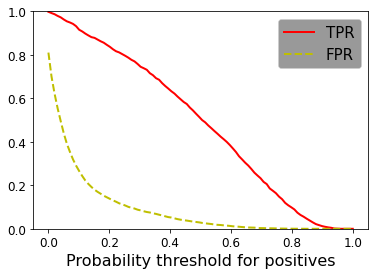

In [ ]:
# for the randam forest model
# the best threshold should have the highest TRR and lowest FPR, i.e. bigghest gap between TPR and FPR.

plot_tpr_fpr_vs_threshold(rf, X_train, np.ravel(y_train))

Optimal_threshold is 0.17


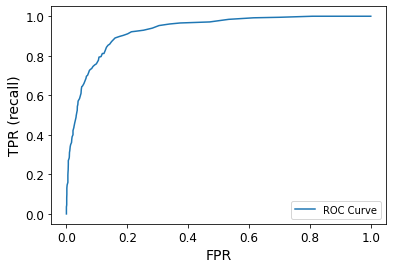

In [ ]:
#DR - I will maybe update code so that we can put all ROC curves on the same plot

# plot roc_curve for random forest model
from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax

fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
plt.legend(loc=4)
print ('Optimal_threshold is', optimal_threshold)

In [ ]:
# check area under roc curve score for Random Forest

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rf_probs)

0.9265508335761876

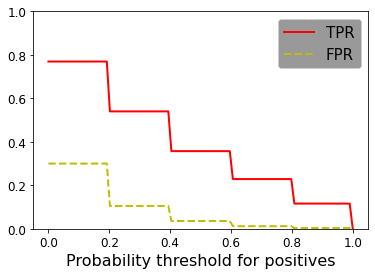

In [ ]:
# for the KNN model
# the best threshold should have the highest TRR and lowest FPR, i.e. bigghest gap between TPR and FPR.
# From the graph, it looks like the optimal threshold should be around 0.4

plot_tpr_fpr_vs_threshold(kf, X_train, np.ravel(y_train))

Optimal_threshold is 0.2


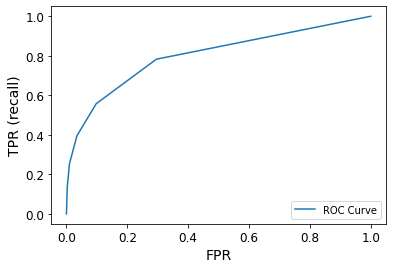

In [ ]:
# plot roc_curve for KNN model
from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax

fpr, tpr, thresholds = roc_curve(y_test, kf_probs)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
plt.legend(loc=4)
print ('Optimal_threshold is', optimal_threshold)

In [ ]:
# check area under ROC curve score for KNN

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, kf_probs)

0.8001100380862417

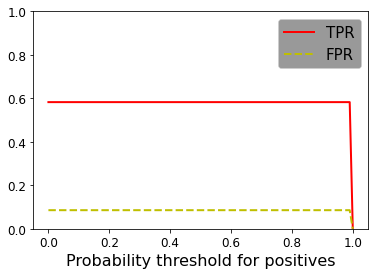

In [ ]:
# for the Decision Tree model
# the best threshold should have the highest TRR and lowest FPR, i.e. bigghest gap between TPR and FPR.

plot_tpr_fpr_vs_threshold(dt, X_train, np.ravel(y_train))

Optimal_threshold is 1.0


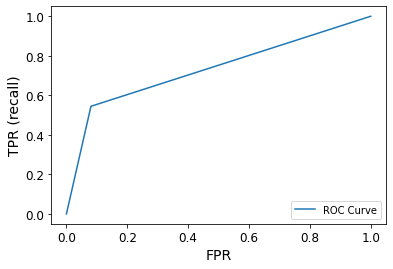

In [ ]:
# plot roc_curve for DT model
from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax

fpr, tpr, thresholds = roc_curve(y_test, dt_probs)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
plt.legend(loc=4)
print ('Optimal_threshold is', optimal_threshold)

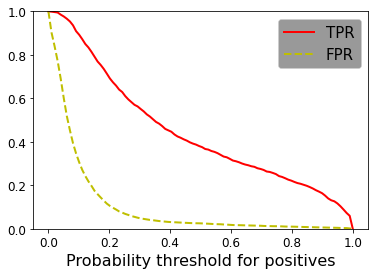

In [ ]:
# for the logisitic model
# the best threshold should have the highest TRR and lowest FPR, i.e. bigghest gap between TPR and FPR.

plot_tpr_fpr_vs_threshold(lg, X_train, np.ravel(y_train))

Optimal_threshold is 0.15536269959012033


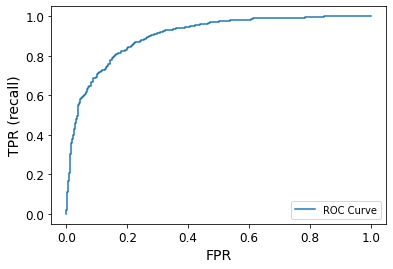

In [ ]:
# plot roc_curve for Logistic model
from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax

fpr, tpr, thresholds = roc_curve(y_test, lg_probs)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
plt.legend(loc=4)
print ('Optimal_threshold is', optimal_threshold)

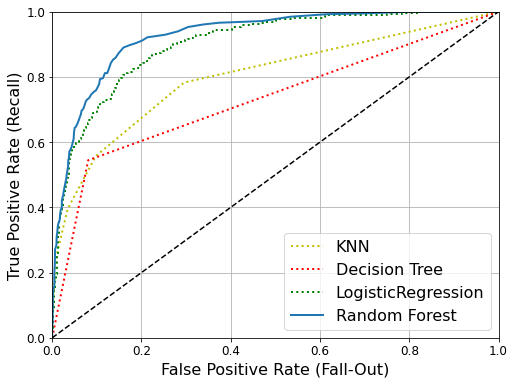

In [ ]:
#Function to plot the ROC Curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

#Extract FPR & TPR from the models using ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_probs)
fpr_kf, tpr_kf, thresholds_kf = roc_curve(y_test, kf_probs)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_test, lg_probs)

# Can use the below code to plot 2 models on the same ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_kf, tpr_kf, "y:", linewidth=2, label="KNN")
plt.plot(fpr_dt, tpr_dt, "r:", linewidth=2, label="Decision Tree")
plt.plot(fpr_lg, tpr_lg, "g:", linewidth=2, label="LogisticRegression")
plot_roc_curve(fpr_rf, tpr_rf, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.savefig("ROC_Curve.png")
plt.show();

In [ ]:
# Using GridSearch to find determine the hyperparameters for random forest model

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [4, 5, 10, 20, 50]}]

rfc_ptune = rfc(random_state=0)

grid_search = GridSearchCV(rfc_ptune, param_grid, scoring='roc_auc',cv=5)

grid_search.fit(X=X_test, y= np.ravel(y_test))

print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)


{'n_estimators': 50}

 RandomForestClassifier(n_estimators=50, random_state=0)


Accuracy: 0.8937550689375506

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2084
           1       0.74      0.49      0.59       382

    accuracy                           0.89      2466
   macro avg       0.82      0.73      0.76      2466
weighted avg       0.88      0.89      0.88      2466


Average 5-Fold CV Score: 0.8941 , Standard deviation: 0.0115


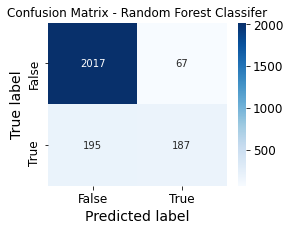

In [ ]:
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

rf  = rfc(n_estimators=50, random_state=0)
rf.fit(X_train, np.ravel(y_train))

y_pred_rf =rf.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred_rf,np.ravel(y_test)))

## 5-fold cross-validation 
cv_scores =cross_val_score(rf, X, np.ravel(y), cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(np.ravel(y_test), y_pred_rf))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(np.ravel(y_test),rf.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['False', 'True'], 
            yticklabels = ['False', 'True'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest Classifer");

In [ ]:
# Using GridSearch to find determine the hyperparameters for KNN model

param_grid = [
    {'n_neighbors': [3, 5, 10, 20]}]

knc_ptune = knnc()

grid_search = GridSearchCV(knc_ptune, param_grid, scoring='roc_auc',cv=5)

grid_search.fit(X=X_test, y= np.ravel(y_test))

print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)

{'n_neighbors': 20}

 KNeighborsClassifier(n_neighbors=20)


Accuracy: 0.8844282238442822

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2084
           1       0.82      0.32      0.47       382

    accuracy                           0.88      2466
   macro avg       0.85      0.66      0.70      2466
weighted avg       0.88      0.88      0.86      2466


Average 5-Fold CV Score: 0.8775 , Standard deviation: 0.0113


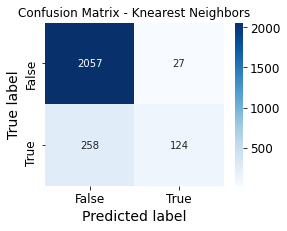

In [ ]:
knn = knnc( n_neighbors=20)
knn.fit(X_train, np.ravel(y_train))

y_pred_KNN =knn.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred_KNN,np.ravel(y_test)))

## 5-fold cross-validation 
cv_scores =cross_val_score(knn, X, np.ravel(y), cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(np.ravel(y_test), y_pred_KNN))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(np.ravel(y_test),knn.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['False', 'True'], 
            yticklabels = ['False', 'True'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Knearest Neighbors");

In [ ]:
# Decision Tree Hyperparameter Tuning

## RandomizedSearchCV

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from scipy.stats import uniform
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier(random_state=0)

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 2}
Best score is 0.8956789374609972


Accuracy: 0.894566098945661

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2084
           1       0.68      0.60      0.64       382

    accuracy                           0.89      2466
   macro avg       0.80      0.77      0.79      2466
weighted avg       0.89      0.89      0.89      2466


Average 5-Fold CV Score: 0.9002 , Standard deviation: 0.0216


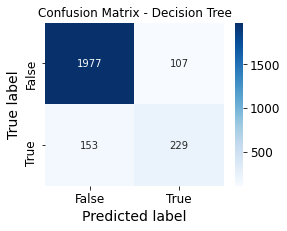

In [ ]:
tree = dtc(criterion="gini", max_depth= 3, max_features=8, min_samples_leaf=2, random_state=0)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(tree, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,tree.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['False','True'], 
            yticklabels = ['False','True'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree");

In [ ]:
# Using GridSearch to find determine the hyperparameters for Logisticregression model
param_grid = {
    'penalty': ['l2','l1'],
    }

lgt_ptune = lgt(solver='liblinear', random_state=0)

grid_search = GridSearchCV(lgt_ptune, param_grid, scoring='roc_auc',cv=5, n_jobs=-1)

grid_search.fit(X=X_test, y= np.ravel(y_test))

print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)

{'penalty': 'l1'}

 LogisticRegression(penalty='l1', random_state=0, solver='liblinear')


Accuracy: 0.8876723438767234

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2084
           1       0.76      0.40      0.53       382

    accuracy                           0.89      2466
   macro avg       0.83      0.69      0.73      2466
weighted avg       0.88      0.89      0.87      2466


Average 5-Fold CV Score: 0.8831 , Standard deviation: 0.008


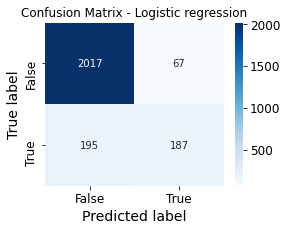

In [ ]:
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

lg = lgt(solver='liblinear',penalty= 'l1', random_state=0)
lg.fit(X_train, np.ravel(y_train))

y_pred_lg =lg.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred_lg,np.ravel(y_test)))

## 5-fold cross-validation 
cv_scores =cross_val_score(lg, X, np.ravel(y), cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(np.ravel(y_test), y_pred_lg))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(np.ravel(y_test),rf.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['False', 'True'], 
            yticklabels = ['False', 'True'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic regression");

In [ ]:
# Using the best parameters to check the mean accuracy using cross validation 
# *** please double check best parameter for Decision Tree
classifiers = [
    knnc(n_neighbors=20),
    rfc(n_estimators=50, random_state=0),
    dtc(criterion="entropy", max_features=6, min_samples_leaf=7, random_state=0),
    lgt(penalty='l1',solver='liblinear', random_state=0),]
classifier_names = [
    'K nearest neighbors',
    'Random Forest Classifier',
    'Decision Tree Classifier',
     'LogisticRegression',]

for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, X_train, np.ravel(y_train), cv=5)
    
    print(clf_name, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%'
          , 'score: ', cv_scores)

K nearest neighbors  mean accuracy:  87.571 % std:  0.002 % score:  [0.8768373  0.87835783 0.88190573 0.87430309 0.86713996]
Random Forest Classifier  mean accuracy:  89.832 % std:  0.003 % score:  [0.89964521 0.90167258 0.90623416 0.89457679 0.88945233]
Decision Tree Classifier  mean accuracy:  88.666 % std:  0.002 % score:  [0.88139888 0.88494678 0.89254942 0.8839331  0.89046653]
LogisticRegression  mean accuracy:  88.27 % std:  0.001 % score:  [0.88646731 0.88545362 0.88545362 0.87734415 0.87880325]


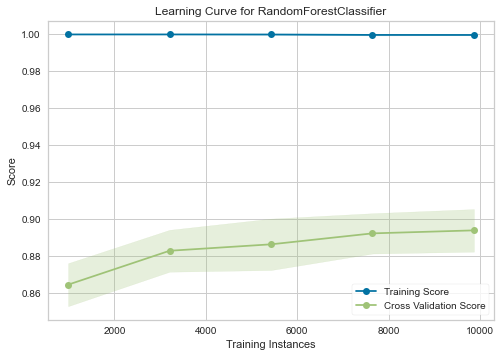

LearningCurve(ax=<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>,
              cv=5,
              estimator=RandomForestClassifier(n_estimators=50, random_state=0),
              scoring='accuracy')


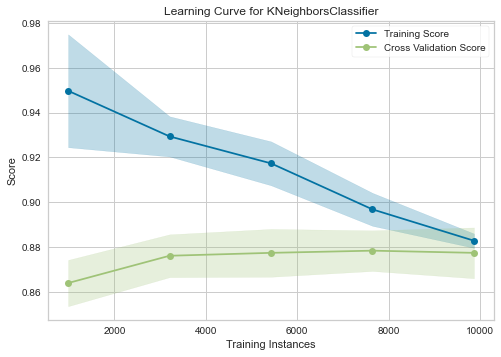

LearningCurve(ax=<AxesSubplot:title={'center':'Learning Curve for KNeighborsClassifier'}, xlabel='Training Instances', ylabel='Score'>,
              cv=5, estimator=KNeighborsClassifier(n_neighbors=20),
              scoring='accuracy')


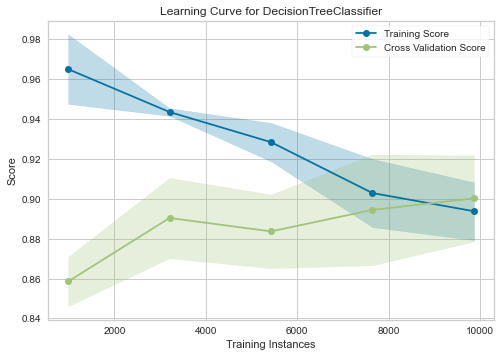

LearningCurve(ax=<AxesSubplot:title={'center':'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>,
              cv=5,
              estimator=DecisionTreeClassifier(max_depth=3, max_features=8,
                                               min_samples_leaf=2,
                                               random_state=0),
              scoring='accuracy')


C:\Users\Gigi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Gigi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gigi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\Gigi\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 926, in _fit_liblinear
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  warnings.warn("Estimator fit failed. The score on this train-test"


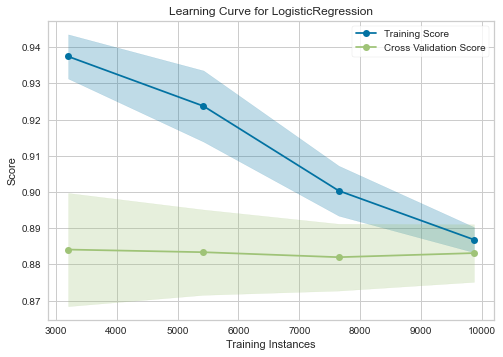

LearningCurve(ax=<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>,
              cv=5,
              estimator=LogisticRegression(penalty='l1', random_state=0,
                                           solver='liblinear'),
              scoring='accuracy')


In [ ]:
#Experimenting with Learning Curve
#Found this resource: https://towardsdatascience.com/plotting-the-learning-curve-with-a-single-line-of-code-90a5bbb0f48a
#Before Running this cell please make sure you have installed yellow brick

# command line: pip install yellowbrick

from yellowbrick.model_selection import learning_curve

model=rfc(n_estimators=50, random_state=0)
print(learning_curve(model, X, np.ravel(y), cv=5, scoring='accuracy'))

model2=knnc(n_neighbors=20)
print(learning_curve(model2, X, np.ravel(y) , cv=5, scoring='accuracy'))

model3=dtc(criterion="gini", max_features=8, min_samples_leaf=2, max_depth=3, random_state=0)
print(learning_curve(model3, X, np.ravel(y), cv=5, scoring='accuracy'))

model4= lgt(penalty='l1',solver='liblinear', random_state=0)
print(learning_curve(model4, X, np.ravel(y), cv=5, scoring = 'accuracy'))